In [934]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [935]:
df = pd.read_csv("./input/project/bbc_data.csv")

In [936]:
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [937]:
df.isnull().sum()

data      0
labels    0
dtype: int64

In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [939]:
df['labels'].value_counts()

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [940]:
from gensim.models import Word2Vec

In [941]:
df['labels'] = df['labels'].map({'entertainment':0, 'business':1, 'sport':2, 'politics':3, 'tech':4})

In [942]:
import string
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


def data_cleaning(text):

    # Convert to lower
    text = text.lower()
    

    remove_stopwords = [word for word in text.split() if word not in stop_words]
    text = ' '.join(remove_stopwords)
    
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    text = re.sub(r"\d", '', text)
    
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text)
    
    return text
    

In [943]:
df['data_cleaned'] = df['data'].apply(data_cleaning)

In [944]:
df['labels']

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: labels, Length: 2225, dtype: int64

In [945]:
X = df['data_cleaned']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [946]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(df['data_cleaned'])

CountVectorizer()

In [947]:
X_train = vect.transform(X_train).toarray()
X_test = vect.transform(X_test).toarray()

In [948]:
# examine the vocabulary and document-term matrix together
# pd.DataFrame(X_train, columns=vect.get_feature_names_out())

In [950]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(multi_class='ovr')
model_lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [952]:
prediction_lr = model_lr.predict(X_test)
accuracy_score(y_test, prediction_lr)

0.9797752808988764

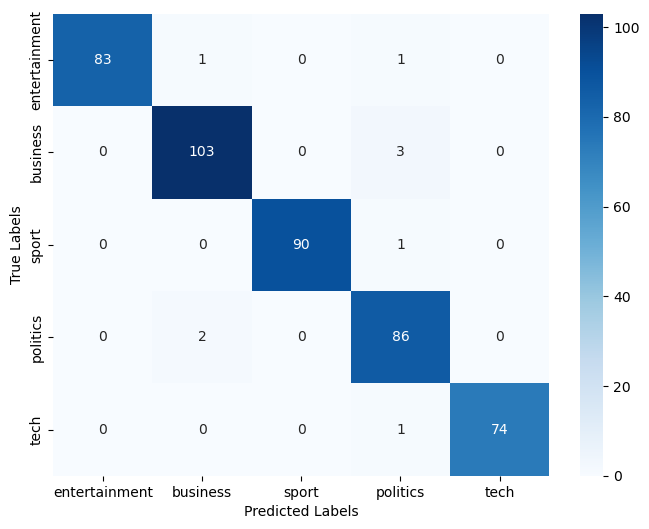

In [953]:
import seaborn as sns
class_labels = ['entertainment', 'business','sport','politics','tech']

conf_matrix = confusion_matrix(prediction_lr, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [954]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [955]:
prediction_rf = model_rf.predict(X_test)
accuracy_score(y_test, prediction_rf)

0.9730337078651685

In [603]:
# EMBEDDING_DIM = 300

# input = tf.keras.Input(shape=(max_length,))
# embedding_sequence = Embedding(vocab, EMBEDDING_DIM, input_length=max_length)(input)
# x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(embedding_sequence)

# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# outputs = Dense(5, activation='softmax')(x)

# model = tf.keras.Model(input, outputs)

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [604]:
# model.fit(X_train, y_train, validation_split=0.2, epochs=20)